In [321]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import lightgbm as lgb
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [322]:
# load train data which is riceprice.csv
df = pd.read_csv('riceprice.csv')
df.head()

,division,district,upazila,bazar,merchandise,price_type,year,lowest_price,maximum_price,price
0,Khulna,Satkhira,Satkhira Sadar,Satkhira Sadar,Aman,Retail,2010,4.0,5.0,4.50
1,Dhaka,Rajbari,Rajbari Sadar,Rajbari Sadar,Aman,Retail,2010,5.0,5.0,5.00
2,Dhaka,Kishoreganj,Kishoreganj Sadar,Kishoreganj Sadar,Aman,Retail,2010,5.0,6.0,5.50
3,Dhaka,Netrokona,Netrokona Sadar,Netrokona Sadar,Aman,Retail,2010,10.0,12.0,11.00
4,Dhaka,Netrokona,Netrokona Sadar,Netrokona Sadar,Aman,Retail,2010,12.0,12.5,12.25


In [323]:
df.dtypes

division          object
district          object
upazila           object
bazar             object
merchandise       object
price_type        object
year               int64
lowest_price     float64
maximum_price    float64
price            float64
dtype: object

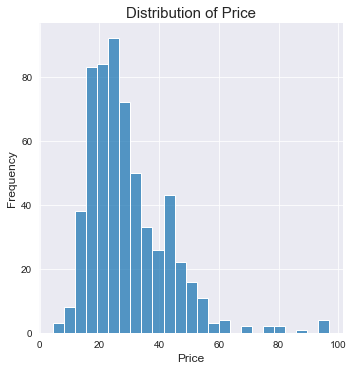

In [324]:
# make a seaborn plot to see the distribution of price
sns.displot(df['price'])
# label
plt.xlabel('Price', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
plt.title('Distribution of Price', fontsize= 15)
plt.savefig('images/distribution.pdf')
plt.show()

# Convert to PDF



<Figure size 1296x504 with 0 Axes>

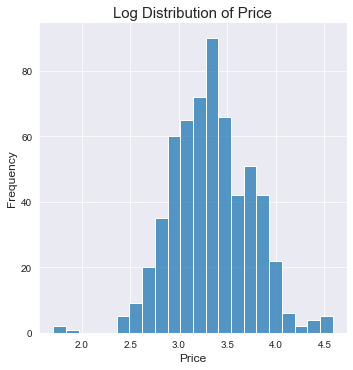

In [325]:
# use log transformation to make the distribution more normal
plt.figure(figsize= (18, 7))
sns.displot(np.log1p(df['price']))
# label
plt.xlabel('Price', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
plt.title('Log Distribution of Price', fontsize= 15)
plt.savefig('images/logdistribution.pdf')
plt.show()

c:\users\errhy\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


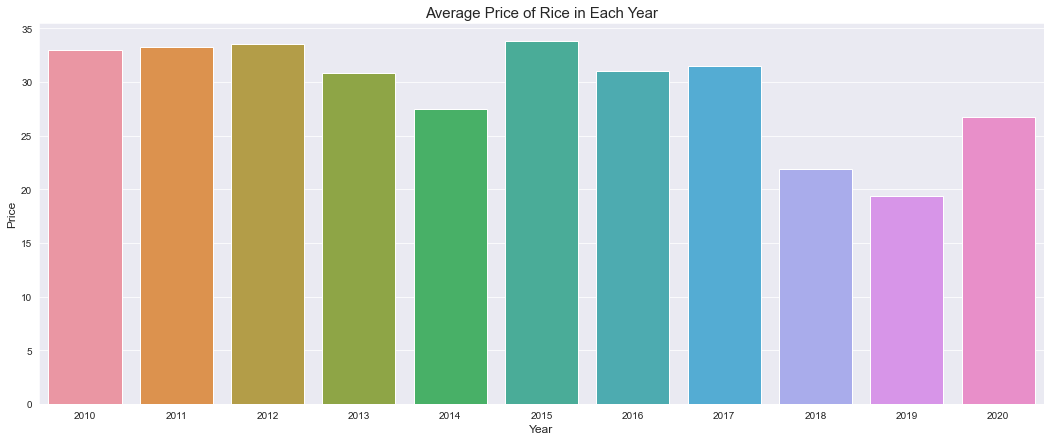

In [326]:
# most costly year: get an average price of each year and make a barplot
year_df = df.groupby('year')['price'].mean()

plt.figure(figsize= (18, 7))
sns.barplot(year_df.index, year_df.values)
plt.xlabel('Year', fontsize= 12)
plt.ylabel('Price', fontsize= 12)
plt.title('Average Price of Rice in Each Year', fontsize= 15)
plt.savefig('images/averageprice.pdf')
plt.show()

In [327]:
# make a correlation heatmap to see the correlation between features

# get the features df name
corr_df = ['division', 'district', 'upazila', 'bazar', 'merchandise']

# convert the categorical features to numerical features
le = LabelEncoder()
for i in corr_df:
    df[i] = le.fit_transform(df[i])

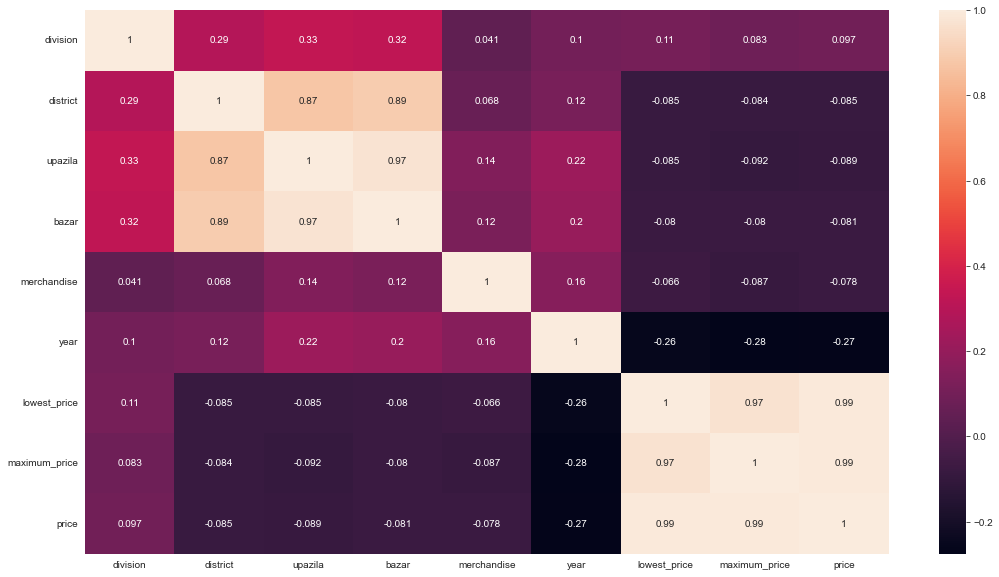

In [328]:
plt.figure(figsize= (18, 10))
sns.heatmap(df.corr(), annot= True);

# Convert to PDF
plt.savefig('images/correlation.pdf')

In [329]:
# use lightgbm model to predict price, already have test data, no need to split
df.drop(['price_type', 'lowest_price', 'maximum_price'], axis= 1, inplace= True)

# get the features and target
X = df.drop('price', axis= 1)
y = df['price']

In [330]:
# import test data
test_df = pd.read_csv('riceprice_test.csv', encoding="ISO-8859-1")

#drop price type
test_df = test_df.drop('price_type', axis=1)

# ideal test data

actual_df = test_df.copy()

test_df

,division,district,upazila,bazar,merchandise,year,price
0,Barisal,Jhalakathi,Jhalakathi Sadar,Jhalakathi Sadar,Boro,2021,18.69
1,Dhaka,Tangail,Tangail Sadar Bazar,Tangail Sadar Bazar,Aman,2021,20.50
2,Barisal,Patuakhali,Patuakhali Sadar,Patuakhali Sadar,Aus,2022,21.00
3,Barisal,Bhola,Bhola Sadar,Bhola Sadar,Boro,2021,21.50
4,Barisal,Barguna,Barguna Sadar,Barguna Sadar,Aus,2021,21.53
...,...,...,...,...,...,...,...
137,Khulna,Jessore,Headquarter of Jessore,Headquarter of Jessore,Boro,2022,38.59
138,Rajshahi,Natore,Natore Sadar,Natore Sadar,Boro,2022,39.71
139,Rangpur,Gaibandha,Gaibandha Sadar,Gaibandha Sadar,Aman,2021,41.00
140,Khulna,Jessore,Headquarter of Jessore,Headquarter of Jessore,Boro,2021,44.82


In [331]:
# convert the categorical features to numerical features except year
le = LabelEncoder()

columns = ['division', 'district', 'upazila', 'bazar', 'merchandise']

for i in columns:
    test_df[i] = le.fit_transform(test_df[i])    
    
test_df

,division,district,upazila,bazar,merchandise,year,price
0,0,5,5,5,2,2021,18.69
1,2,21,21,21,0,2021,20.50
2,0,14,14,14,1,2022,21.00
3,0,1,1,1,2,2021,21.50
4,0,0,0,0,1,2021,21.53
...,...,...,...,...,...,...,...
137,3,4,4,4,2,2022,38.59
138,4,11,11,11,2,2022,39.71
139,5,2,2,2,0,2021,41.00
140,3,4,4,4,2,2021,44.82


In [332]:
# predict the price of test data after removing the price
test_pred = test_df.drop('price', axis=1)

## GridSearchCV

In [272]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

kwargs = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(model, kwargs, cv=5, scoring='neg_mean_squared_error')

grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler',
                                        StandardScaler(with_mean=False)),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [273]:
# predict the price of test data after removing the price
test_pred = test_df.drop('price', axis=1)

In [274]:
predicted_df = grid.predict(test_pred)
predicted_df

array([22.53457682, 24.52959349, 21.60161183, 22.78879099, 23.33955121,
       27.81888744, 26.97069766, 23.76320434, 25.10157537, 27.56467327,
       22.08881851, 22.87345475, 28.53908663, 22.91501456, 23.27599767,
       27.94511102, 26.80203076, 23.68140371, 21.89904139, 27.56467327,
       25.10157537, 27.81888744, 25.44353932, 22.49136143, 27.50111973,
       22.87345475, 28.7933008 , 23.80851079, 24.1694939 , 27.94511102,
       25.95384098, 26.2917291 , 27.56467327, 24.12716202, 27.69089685,
       26.65292995, 24.59314703, 26.71648349, 23.61873368, 24.1694939 ,
       28.53908663, 24.01929183, 27.28923744, 22.93700829, 26.80203076,
       22.97856811, 24.65670058, 28.7933008 , 23.74495725, 26.97069766,
       28.53908663, 23.61873368, 26.92825434, 28.47553309, 27.81888744,
       27.77644412, 24.25338559, 23.80851079, 27.94511102, 26.22817556,
       27.69089685, 27.69089685, 26.71648349, 27.62734331, 27.50111973,
       24.6991439 , 25.37998578, 25.78054393, 28.53908663, 26.88

In [275]:
# merge the prediction dataframe with test dataframe renaming price to predicted price
predicted_df = pd.DataFrame(predicted_df, columns=['predicted_price'])

predicted_df = pd.concat([actual_df, predicted_df], axis=1)

predicted_df

,division,district,upazila,bazar,merchandise,year,price,predicted_price
0,Barisal,Jhalakathi,Jhalakathi Sadar,Jhalakathi Sadar,Boro,2021,18.69,22.534577
1,Dhaka,Tangail,Tangail Sadar Bazar,Tangail Sadar Bazar,Aman,2021,20.50,24.529593
2,Barisal,Patuakhali,Patuakhali Sadar,Patuakhali Sadar,Aus,2022,21.00,21.601612
3,Barisal,Bhola,Bhola Sadar,Bhola Sadar,Boro,2021,21.50,22.788791
4,Barisal,Barguna,Barguna Sadar,Barguna Sadar,Aus,2021,21.53,23.339551
...,...,...,...,...,...,...,...,...
137,Khulna,Jessore,Headquarter of Jessore,Headquarter of Jessore,Boro,2022,38.59,24.806131
138,Rajshahi,Natore,Natore Sadar,Natore Sadar,Boro,2022,39.71,25.379986
139,Rangpur,Gaibandha,Gaibandha Sadar,Gaibandha Sadar,Aman,2021,41.00,28.793301
140,Khulna,Jessore,Headquarter of Jessore,Headquarter of Jessore,Boro,2021,44.82,25.654320


c:\users\errhy\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\errhy\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


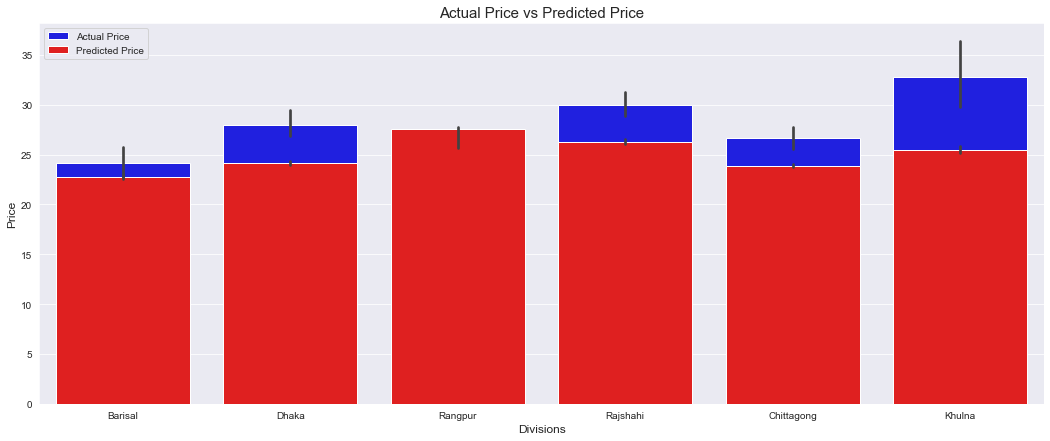

In [276]:
# compare the price and predicted price with seaborn barplot
plt.figure(figsize= (18, 7))
sns.barplot(predicted_df['division'], predicted_df['price'], color= 'blue', label= 'Actual Price')
sns.barplot(predicted_df['division'], predicted_df['predicted_price'], color= 'red', label= 'Predicted Price')
plt.xlabel('Divisions', fontsize= 12)
plt.ylabel('Price', fontsize= 12)
plt.title('Actual Price vs Predicted Price', fontsize= 15)
plt.legend()
plt.savefig('images/grid_barplot.pdf')
plt.show()

c:\users\errhy\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


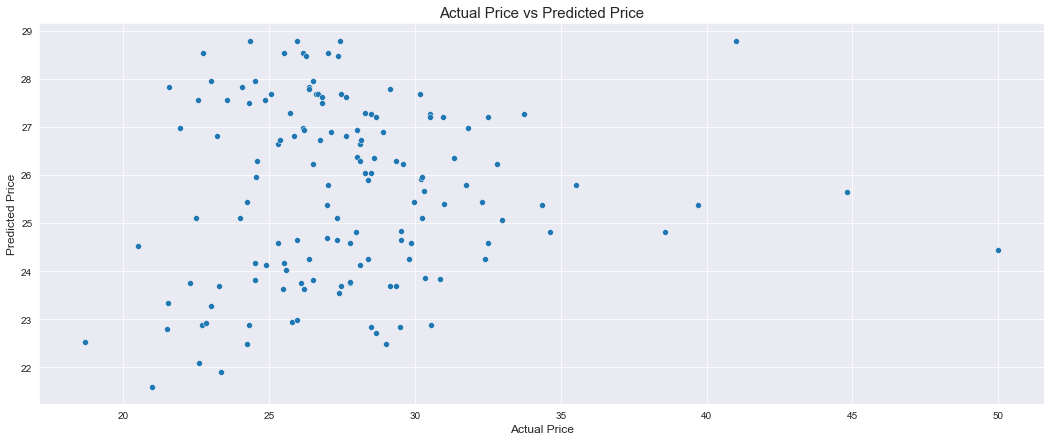

In [282]:
# make a scatter plot to see the difference between actual price and predicted price
plt.figure(figsize= (18, 7))
sns.scatterplot(predicted_df['price'], predicted_df['predicted_price'])
plt.xlabel('Actual Price', fontsize= 12)
plt.ylabel('Predicted Price', fontsize= 12)
plt.title('Actual Price vs Predicted Price', fontsize= 15)
plt.savefig('images/grid_scatter.pdf')
plt.show()


## Ridge regression

In [296]:
# Ridge regression to train the model and predict the price
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01, normalize=True)
ridge.fit(X, y)

c:\users\errhy\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.01, normalize=True)

In [297]:
# predict the price of test data after removing the price
test_pred = test_df.drop('price', axis=1)

In [298]:
predicted_df = ridge.predict(test_pred)
predicted_df

array([21.15898195, 23.32953517, 19.94787626, 21.48015262, 22.07417005,
       27.46932593, 26.46712949, 22.50760214, 24.05216918, 27.14815526,
       20.46160102, 21.38350479, 28.17560478, 21.5054057 , 21.99387738,
       27.49457901, 26.18464324, 22.32733874, 20.35605527, 27.14815526,
       24.05216918, 27.46932593, 24.61089496, 21.07197361, 27.06786259,
       21.38350479, 28.49677545, 22.48792407, 22.97639575, 27.49457901,
       25.18244681, 25.61309139, 27.14815526, 23.02471967, 27.17340834,
       26.06566615, 23.40982784, 26.14595882, 22.38237832, 22.97639575,
       28.17560478, 22.75798332, 26.698368  , 21.46379746, 26.18464324,
       21.58569837, 23.49012051, 28.49677545, 22.4076314 , 26.46712949,
       28.17560478, 22.38237832, 26.20989633, 28.09531211, 27.46932593,
       27.21209276, 23.04997275, 22.48792407, 27.49457901, 25.53279872,
       27.17340834, 27.17340834, 26.14595882, 27.09311567, 27.06786259,
       23.74735368, 24.53060229, 24.90620728, 28.17560478, 26.15

In [299]:
# merge the prediction dataframe with test dataframe renaming price to predicted price
predicted_df = pd.DataFrame(predicted_df, columns=['predicted_price'])

predicted_df = pd.concat([actual_df, predicted_df], axis=1)

predicted_df

,division,district,upazila,bazar,merchandise,year,price,predicted_price
0,Barisal,Jhalakathi,Jhalakathi Sadar,Jhalakathi Sadar,Boro,2021,18.69,21.158982
1,Dhaka,Tangail,Tangail Sadar Bazar,Tangail Sadar Bazar,Aman,2021,20.50,23.329535
2,Barisal,Patuakhali,Patuakhali Sadar,Patuakhali Sadar,Aus,2022,21.00,19.947876
3,Barisal,Bhola,Bhola Sadar,Bhola Sadar,Boro,2021,21.50,21.480153
4,Barisal,Barguna,Barguna Sadar,Barguna Sadar,Aus,2021,21.53,22.074170
...,...,...,...,...,...,...,...,...
137,Khulna,Jessore,Headquarter of Jessore,Headquarter of Jessore,Boro,2022,38.59,23.878758
138,Rajshahi,Natore,Natore Sadar,Natore Sadar,Boro,2022,39.71,24.530602
139,Rangpur,Gaibandha,Gaibandha Sadar,Gaibandha Sadar,Aman,2021,41.00,28.496775
140,Khulna,Jessore,Headquarter of Jessore,Headquarter of Jessore,Boro,2021,44.82,24.880954


c:\users\errhy\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\errhy\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


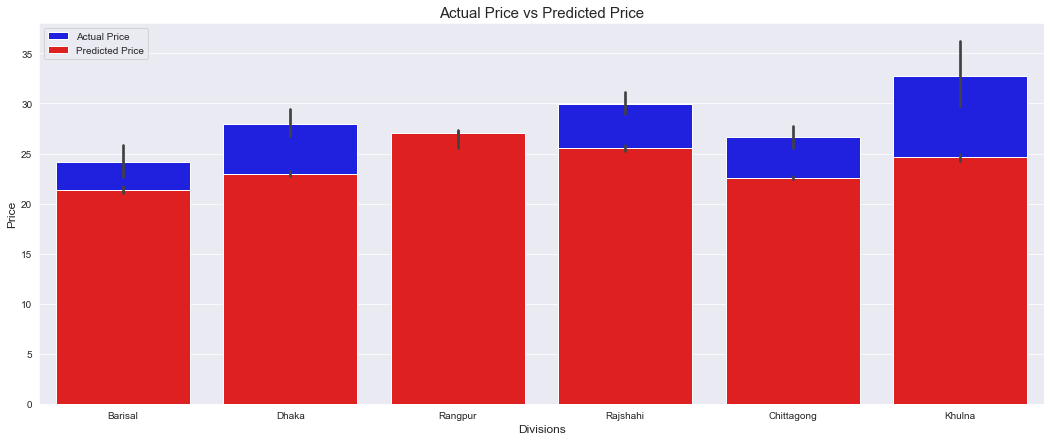

In [302]:
# compare the price and predicted price with seaborn barplot
plt.figure(figsize= (18, 7))
sns.barplot(predicted_df['division'], predicted_df['price'], color= 'blue', label= 'Actual Price')
sns.barplot(predicted_df['division'], predicted_df['predicted_price'], color= 'red', label= 'Predicted Price')
plt.xlabel('Divisions', fontsize= 12)
plt.ylabel('Price', fontsize= 12)
plt.title('Actual Price vs Predicted Price', fontsize= 15)
plt.legend()
plt.savefig('images/ridge_barplot.pdf')
plt.show()

c:\users\errhy\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


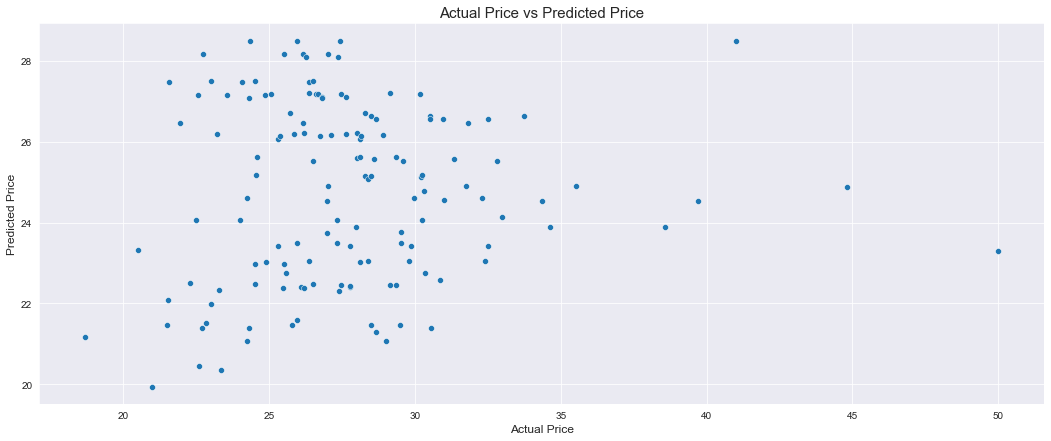

In [303]:
# make a scatterplot by seaborn comparing the actual price and predicted price
plt.figure(figsize= (18, 7))
sns.scatterplot(predicted_df['price'], predicted_df['predicted_price'])
plt.xlabel('Actual Price', fontsize= 12)
plt.ylabel('Predicted Price', fontsize= 12)
plt.title('Actual Price vs Predicted Price', fontsize= 15)
plt.savefig('images/ridge_scatter.pdf')
plt.show()

## DecisionTree

In [316]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X, y)

DecisionTreeRegressor()

In [317]:
# predict the price
y_pred = dt.predict(test_pred)

In [318]:
# add the predicted price to the test data after renaming the column to predicted_price

actual_df['predicted_price'] = y_pred

test_df = actual_df.copy()

test_df

,division,district,upazila,bazar,merchandise,year,price,predicted_price
0,Barisal,Jhalakathi,Jhalakathi Sadar,Jhalakathi Sadar,Boro,2021,18.69,21.500000
1,Dhaka,Tangail,Tangail Sadar Bazar,Tangail Sadar Bazar,Aman,2021,20.50,28.963333
2,Barisal,Patuakhali,Patuakhali Sadar,Patuakhali Sadar,Aus,2022,21.00,17.910000
3,Barisal,Bhola,Bhola Sadar,Bhola Sadar,Boro,2021,21.50,21.910000
4,Barisal,Barguna,Barguna Sadar,Barguna Sadar,Aus,2021,21.53,21.910000
...,...,...,...,...,...,...,...,...
137,Khulna,Jessore,Headquarter of Jessore,Headquarter of Jessore,Boro,2022,38.59,21.500000
138,Rajshahi,Natore,Natore Sadar,Natore Sadar,Boro,2022,39.71,87.820000
139,Rangpur,Gaibandha,Gaibandha Sadar,Gaibandha Sadar,Aman,2021,41.00,23.355000
140,Khulna,Jessore,Headquarter of Jessore,Headquarter of Jessore,Boro,2021,44.82,21.500000


c:\users\errhy\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\errhy\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


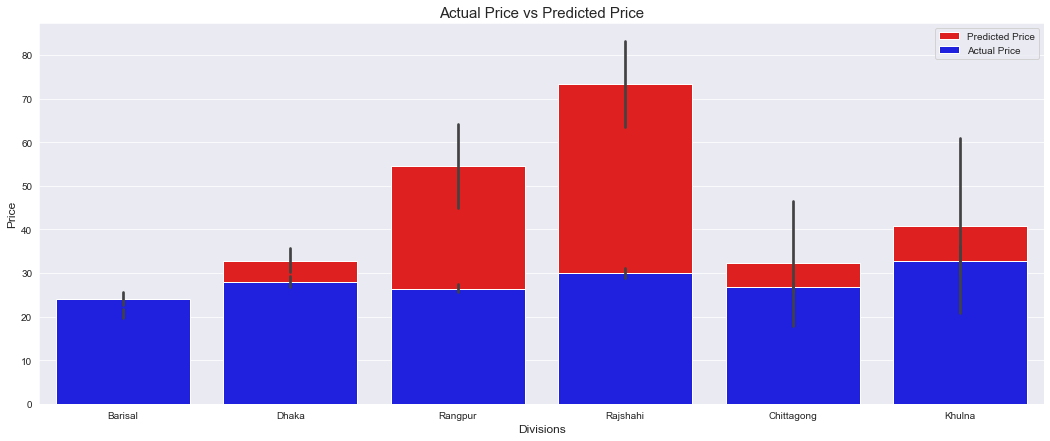

In [319]:
# compare the price and predicted price with seaborn barplot
plt.figure(figsize= (18, 7))
sns.barplot(test_df['division'], test_df['predicted_price'], color= 'red', label= 'Predicted Price')
sns.barplot(test_df['division'], test_df['price'], color= 'blue', label= 'Actual Price')
plt.xlabel('Divisions', fontsize= 12)
plt.ylabel('Price', fontsize= 12)
plt.title('Actual Price vs Predicted Price', fontsize= 15)
plt.legend()
plt.savefig('images/dt_barplot.pdf')
plt.show()

c:\users\errhy\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


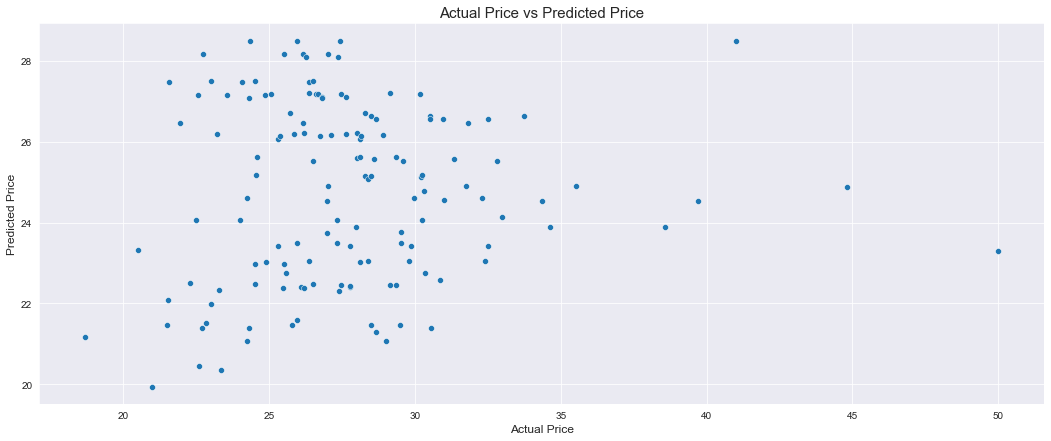

In [320]:
# make a scatterplot by seaborn comparing the actual price and predicted price
plt.figure(figsize= (18, 7))
sns.scatterplot(predicted_df['price'], predicted_df['predicted_price'])
plt.xlabel('Actual Price', fontsize= 12)
plt.ylabel('Predicted Price', fontsize= 12)
plt.title('Actual Price vs Predicted Price', fontsize= 15)
plt.savefig('images/dt_scatter.pdf')
plt.show()

## LightGBM

In [333]:
# make a lightgbm model
model = lgb.LGBMRegressor()
model.fit(X, y)

LGBMRegressor()

In [334]:
pred = model.predict(test_pred)

In [335]:
# make a dataframe of prediction
pred_df = pd.DataFrame(pred, columns=['price'])

In [336]:
pred_df

,price
0,38.413509
1,29.075532
2,28.151558
3,28.128069
4,20.231084
...,...
137,44.150996
138,63.444547
139,34.972928
140,44.150996


In [338]:
# merge the prediction dataframe with test dataframe renaming price to predicted price
actual_df['predicted_price'] = pred_df

test_df = actual_df.copy()

test_df

,division,district,upazila,bazar,merchandise,year,price,predicted_price
0,Barisal,Jhalakathi,Jhalakathi Sadar,Jhalakathi Sadar,Boro,2021,18.69,38.413509
1,Dhaka,Tangail,Tangail Sadar Bazar,Tangail Sadar Bazar,Aman,2021,20.50,29.075532
2,Barisal,Patuakhali,Patuakhali Sadar,Patuakhali Sadar,Aus,2022,21.00,28.151558
3,Barisal,Bhola,Bhola Sadar,Bhola Sadar,Boro,2021,21.50,28.128069
4,Barisal,Barguna,Barguna Sadar,Barguna Sadar,Aus,2021,21.53,20.231084
...,...,...,...,...,...,...,...,...
137,Khulna,Jessore,Headquarter of Jessore,Headquarter of Jessore,Boro,2022,38.59,44.150996
138,Rajshahi,Natore,Natore Sadar,Natore Sadar,Boro,2022,39.71,63.444547
139,Rangpur,Gaibandha,Gaibandha Sadar,Gaibandha Sadar,Aman,2021,41.00,34.972928
140,Khulna,Jessore,Headquarter of Jessore,Headquarter of Jessore,Boro,2021,44.82,44.150996


In [339]:
test_df

,division,district,upazila,bazar,merchandise,year,price,predicted_price
0,Barisal,Jhalakathi,Jhalakathi Sadar,Jhalakathi Sadar,Boro,2021,18.69,38.413509
1,Dhaka,Tangail,Tangail Sadar Bazar,Tangail Sadar Bazar,Aman,2021,20.50,29.075532
2,Barisal,Patuakhali,Patuakhali Sadar,Patuakhali Sadar,Aus,2022,21.00,28.151558
3,Barisal,Bhola,Bhola Sadar,Bhola Sadar,Boro,2021,21.50,28.128069
4,Barisal,Barguna,Barguna Sadar,Barguna Sadar,Aus,2021,21.53,20.231084
...,...,...,...,...,...,...,...,...
137,Khulna,Jessore,Headquarter of Jessore,Headquarter of Jessore,Boro,2022,38.59,44.150996
138,Rajshahi,Natore,Natore Sadar,Natore Sadar,Boro,2022,39.71,63.444547
139,Rangpur,Gaibandha,Gaibandha Sadar,Gaibandha Sadar,Aman,2021,41.00,34.972928
140,Khulna,Jessore,Headquarter of Jessore,Headquarter of Jessore,Boro,2021,44.82,44.150996


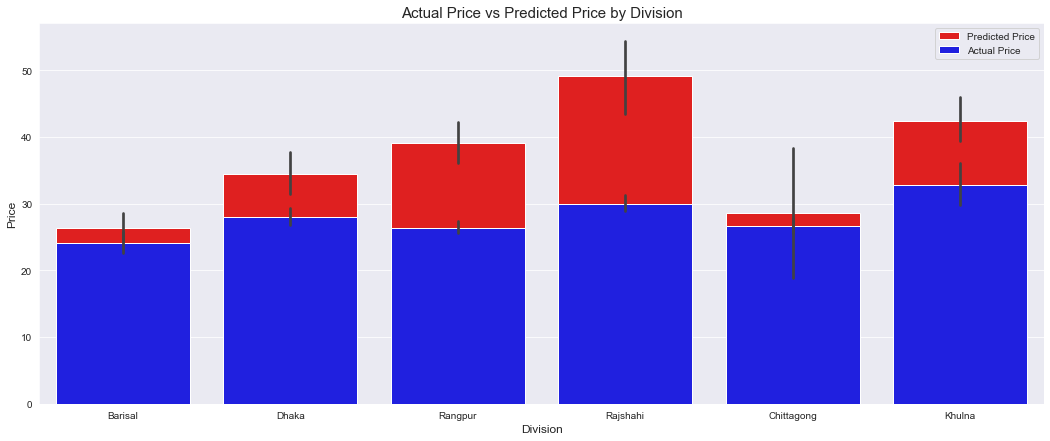

In [345]:
# make a comparison figure to show the difference between actual price and predicted price by departments
plt.figure(figsize=(18, 7))
sns.barplot(x='division', y='predicted_price', data=test_df, color='red', label='Predicted Price')
sns.barplot(x='division', y='price', data=test_df, color='blue', label='Actual Price')
plt.xlabel('Division', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Actual Price vs Predicted Price by Division', fontsize=15)
plt.legend()
plt.savefig('images/lgbm_barplot.pdf')
plt.show()


c:\users\errhy\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


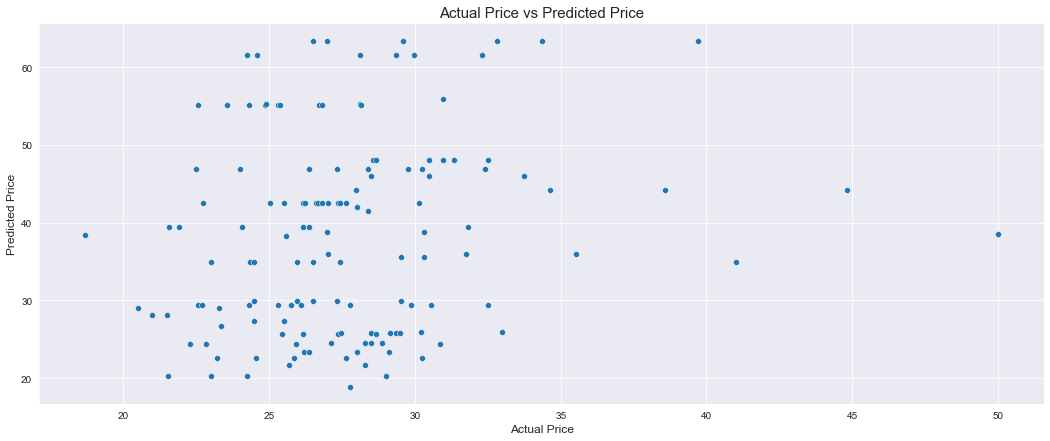

In [343]:
# make a scatterplot by seaborn comparing the actual price and predicted price
plt.figure(figsize= (18, 7))
sns.scatterplot(test_df['price'], test_df['predicted_price'])
plt.xlabel('Actual Price', fontsize= 12)
plt.ylabel('Predicted Price', fontsize= 12)
plt.title('Actual Price vs Predicted Price', fontsize= 15)
plt.savefig('images/lgbm_scatter.pdf')
plt.show()